# **Section 3: Geographical Analysis of Demand and Supply**
Problem Statement: Analyze the geographical distribution of vehicle advertisements to understand demand and supply patterns.

Step 1: Data Cleaning & Preprocessing

    Handle Missing Values: Fill in or remove missing data appropriately.
    Encode Categorical Variables: Convert categorical data into numerical form.
    Normalize/Standardize Numerical Features: Adjust numerical data to a common scale if needed.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import ast

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/EXAMML/vehicles.csv')

In [ ]:
df3 = df.copy()

In [ ]:
df3.shape

(258888, 26)

In [ ]:
pd.pandas.set_option("display.max_columns",None)
pd.pandas.set_option("display.max_rows",None)

# **NULL VALUES PERCENTAGE**

In [ ]:
df3.isnull().sum()/len(df3)*100

ad_title                 0.000000
ad_description           0.002704
details                 39.933485
slug                     0.000000
title                    0.000000
type                     0.000000
price                    1.472065
timestamp                0.002318
posted_date              0.002318
deactivation_date        0.002318
category                 0.000000
parent_category          0.000000
location                 0.000000
geo_region               0.000000
area                     0.000000
is_delivery_free         0.000000
is_doorstep_delivery     0.000000
is_dsd_applicable        0.000000
is_member                3.495720
is_authorized_dealer     3.495720
is_featured_member       3.495720
is_verified              0.000000
membership_level         0.000000
member_since            58.038225
properties               0.000000
user                     0.000000
dtype: float64

# **DROPPING COLUMNS**

In [ ]:
df3.drop(columns = 'details', inplace= True)
df3.drop(columns = 'parent_category', inplace= True)
df3.drop(columns = 'member_since', inplace= True)
df3.drop(columns = 'ad_title', inplace= True)
df3.drop(columns = 'ad_description', inplace= True)
df3.drop(columns = 'type', inplace= True)

In [ ]:
# details column contains distance travelled by the vehicle and aslo year. it might inceaese the complexicity .drop it
# parent category contains only type 'vehicle'
# ad-title and ad-description contains unwanted and unreadable data
# member-since contains null values more tyan 50 %
# type contains only 'vehicle'

Column: Price

    Convert the data type from 'object' to 'float'.
    Remove rows with null values.

In [ ]:
df3['price'] = df3['price'].str.replace('Rs', '', regex=False).str.replace(',', '', regex=False)
df3['price'] = df3['price'].apply(lambda x: np.nan if x == 'Negotiable' else float(x))

In [ ]:
df3 = df3.dropna(subset = 'price')

In [ ]:
df3.isnull().sum()/len(df3)*100

slug                    0.000000
title                   0.000000
price                   0.000000
timestamp               0.002368
posted_date             0.002368
deactivation_date       0.002368
category                0.000000
location                0.000000
geo_region              0.000000
area                    0.000000
is_delivery_free        0.000000
is_doorstep_delivery    0.000000
is_dsd_applicable       0.000000
is_member               3.546905
is_authorized_dealer    3.546905
is_featured_member      3.546905
is_verified             0.000000
membership_level        0.000000
properties              0.000000
user                    0.000000
dtype: float64

Column: Category

Remove unnecessary categories.

In [ ]:
list1 = ['Auto Parts & Accessories','Auto Services','Rentals', 'Tractors','Heavy Duty','Buses','Boats & Water Transport']

for i in list1:
  df3 = df3[df3['category'] != i]
df3.shape

(166065, 20)

In [ ]:
df3.isnull().sum()/len(df3)*100

slug                    0.000000
title                   0.000000
price                   0.000000
timestamp               0.003011
posted_date             0.003011
deactivation_date       0.003011
category                0.000000
location                0.000000
geo_region              0.000000
area                    0.000000
is_delivery_free        0.000000
is_doorstep_delivery    0.000000
is_dsd_applicable       0.000000
is_member               4.725258
is_authorized_dealer    4.725258
is_featured_member      4.725258
is_verified             0.000000
membership_level        0.000000
properties              0.000000
user                    0.000000
dtype: float64

# **HNADLE NULL VALUES**
1. drop null values

In [ ]:
df3=df3.dropna()

In [ ]:
df3.shape

(158214, 20)

# **SELECT FEATURES**

In [ ]:
df31 = df3[["location", "geo_region", "area",]]

In [ ]:
df31.head()

,location,geo_region,area
31,Nugegoda,LK-11,"{'id': 1506, 'name': 'Colombo'}"
1349,Kohuwala,LK-11,"{'id': 1506, 'name': 'Colombo'}"
1701,Kohuwala,LK-11,"{'id': 1506, 'name': 'Colombo'}"
1702,Kohuwala,LK-11,"{'id': 1506, 'name': 'Colombo'}"
1917,Colombo 14,LK-11,"{'id': 1506, 'name': 'Colombo'}"


## **Geo-Region**

1. Group the elements in 'geo_region' by counting their occurrences.
2. Visualize the data.

In [ ]:
# Group the elements in the geo_region by counting their occurrences
df31.groupby('geo_region').size()

geo_region
LK       20550
LK-11    50139
LK-12    27771
LK-21    10179
LK-22     1881
LK-23      768
LK-31     5591
LK-33     2250
LK-41     3929
LK-42      368
LK-43      236
LK-44      772
LK-51     2187
LK-52     2697
LK-53     1974
LK-61    10327
LK-62     4179
LK-71     4880
LK-72     1610
LK-81     2350
LK-92     3576
dtype: int64

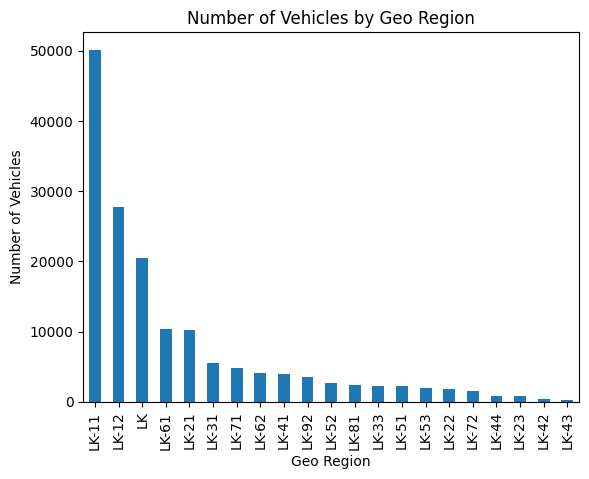

In [ ]:
# Create a bar chart of the grouped data
df31.groupby('geo_region').size().sort_values(ascending=False).plot(kind='bar')

# Add labels and title
plt.xlabel('Geo Region')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles by Geo Region')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
# Insights:
# 1. The graph shows the number of vehicles available in different geo-regions.
# 2. The region with the highest number of vehicles is 'LK-11'.
# 3. The regions with the lowest number of vehicles are 'LK-43'
# 4. This information can be useful for businesses looking to target specific regions for vehicle sales or services.


## **Location**

1. Group the elements in 'LOCATION' by counting their occurrences.
2. Visualize the data.

In [ ]:
df31.groupby('location').size()

location
Ahangama              177
Akkarepattu           884
Akurana               529
Akuressa              550
Alawwa                231
Alutgama              411
Ambalangoda           774
Ambalantota           323
Ampara City           880
Ampitiya               99
Anamaduwa             179
Angoda                624
Anuradhapura City    2631
Athurugiriya          805
Avissawella           542
Baddegama             477
Badulla City          819
Balangoda             577
Bandaragama          2753
Bandarawela           472
Batapola              138
Battaramulla          976
Batticaloa City      2187
Beliatta              659
Bentota               123
Beruwala              274
Bibile                243
Bingiriya             188
Boralesgamuwa        3297
Buttala               173
Chavakachcheri        331
Chilaw               1073
Colombo 1             111
Colombo 10            681
Colombo 11             76
Colombo 12            220
Colombo 13            277
Colombo 14            452
Col

In [ ]:
sorted_locations = df31['location'].value_counts().sort_values(ascending=False)
filtered_locations = sorted_locations[sorted_locations > 1000]
print(filtered_locations)


location
Gampaha City         5111
Piliyandala          4700
Kohuwala             4426
Kurunegala City      4220
Kandy City           4073
Negombo              3653
Jaffna City          3361
Boralesgamuwa        3297
Nugegoda             3026
Dehiwala             2984
Matara City          2796
Katunayake           2756
Galle City           2756
Bandaragama          2753
Ja-Ela               2705
Anuradhapura City    2631
Kottawa              2618
Maharagama           2537
Kadawatha            2269
Batticaloa City      2187
Homagama             2154
Malabe               2149
Moratuwa             1870
Panadura             1869
Minuwangoda          1772
Kalutara City        1666
Ratnapura City       1558
Wattala              1550
Kaduwela             1469
Horana               1292
Katugastota          1281
Nittambuwa           1262
Trincomalee City     1254
Gampola              1212
Kiribathgoda         1211
Kuliyapitiya         1208
Colombo 8            1195
Rajagiriya           1192
Keg

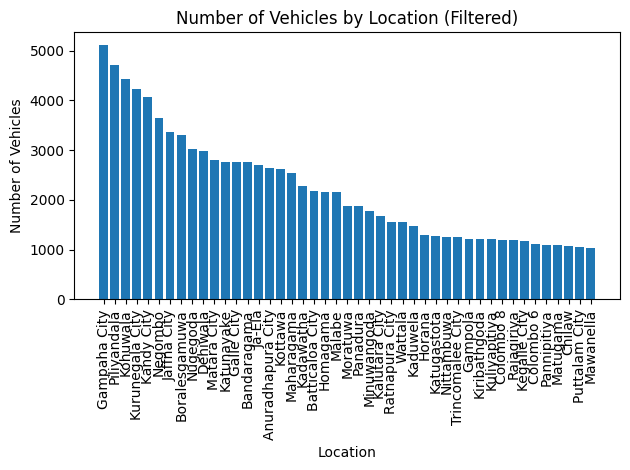

In [ ]:
# prompt: plot bar chart for filtered_locations

# Prepare data for the bar chart
locations = filtered_locations.index.to_list()
counts = filtered_locations.values.tolist()

# Create the bar chart
plt.bar(locations, counts)

# Customize the chart
plt.xlabel("Location")
plt.ylabel("Number of Vehicles")
plt.title("Number of Vehicles by Location (Filtered)")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the chart
plt.show()


In [ ]:
## Insights:

# 1. The graph shows the number of vehicles available in different locations.
# 2. The location with the highest number of vehicles is 'Gampala city'.
# 3. The location with the lowest number of vehicles is 'Mawanella'.
# 4. This information can be useful for targeting specific locations for vehicle sales or services.
# 5. The data is filtered to only show locations with more than 1,000 vehicles.
# 6. The most popular location for vehicles is Gampala city.
# 7. There is a significant drop-off in the number of vehicles available in other locations.

# **AREA**
1. Separate out the id and area name

In [ ]:
dict_df=df31["area"].apply(pd.Series)

In [ ]:
df31['area'].head()

31      {'id': 1506, 'name': 'Colombo'}
1349    {'id': 1506, 'name': 'Colombo'}
1701    {'id': 1506, 'name': 'Colombo'}
1702    {'id': 1506, 'name': 'Colombo'}
1917    {'id': 1506, 'name': 'Colombo'}
Name: area, dtype: object

In [ ]:
dict_converted = ast.literal_eval(dict_df.iloc[2][0])
print(dict_converted)

{'id': 1506, 'name': 'Colombo'}


In [ ]:
Id = []
Name = []

for i in range(dict_df.shape[0]):
    dict_converted = ast.literal_eval(dict_df.iloc[i][0])
    if 'id' not in dict_converted:
        Id.append('NaN')
    else:
        Id.append(dict_converted['id'])

    if 'name' in dict_converted:
        Name.append(dict_converted['name'])
    else:
        Name.append('NaN')

In [ ]:
df31['Id'] = Id
df31['Name'] = Name

In [ ]:
df31.head()

,location,geo_region,area,Id,Name
31,Nugegoda,LK-11,"{'id': 1506, 'name': 'Colombo'}",1506,Colombo
1349,Kohuwala,LK-11,"{'id': 1506, 'name': 'Colombo'}",1506,Colombo
1701,Kohuwala,LK-11,"{'id': 1506, 'name': 'Colombo'}",1506,Colombo
1702,Kohuwala,LK-11,"{'id': 1506, 'name': 'Colombo'}",1506,Colombo
1917,Colombo 14,LK-11,"{'id': 1506, 'name': 'Colombo'}",1506,Colombo


In [ ]:
df31.groupby('Name').size()

Name
Ampara           2697
Anuradhapura     4880
Badulla          2350
Batticaloa       2187
Colombo         50139
Galle            5591
Gampaha         27771
Hambantota       2250
Jaffna           3929
Kalutara         9753
Kandy           10179
Kegalle          3576
Kilinochchi       368
Kurunegala      10327
Mannar            236
Matale           1881
Matara           4952
Monaragala       1551
Mullativu         219
Nuwara Eliya      768
Polonnaruwa      1610
Puttalam         4179
Ratnapura        4075
Trincomalee      1974
Vavuniya          772
dtype: int64

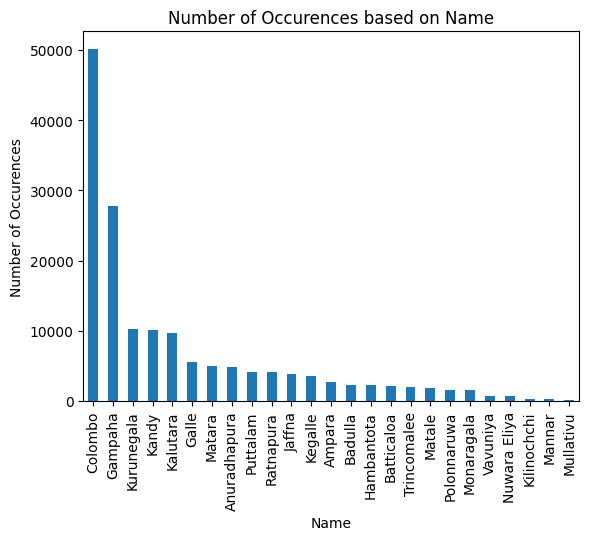

In [ ]:
# Create a bar chart of the grouped data
df31.groupby('Name').size().sort_values(ascending=False).plot(kind='bar')

# Add labels and title
plt.xlabel('Name')
plt.ylabel('Number of Occurences')
plt.title('Number of Occurences based on Name')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
## Insights:

# 1. The graph shows the number of occurrences of different area names.
# 2. The area with the highest number of occurrences is 'Colombo'.
# 3. The area with the lowest number of occurrences is 'Millativu'.
# 4. This information can be useful for targeting specific areas for vehicle sales or services.
# 5. The most popular areas for vehicles are in the Colombo district.

# **POSTED DATE AND DEACTIVATED DATE**

In [ ]:
df31= df31.join(df[['posted_date', 'deactivation_date']])

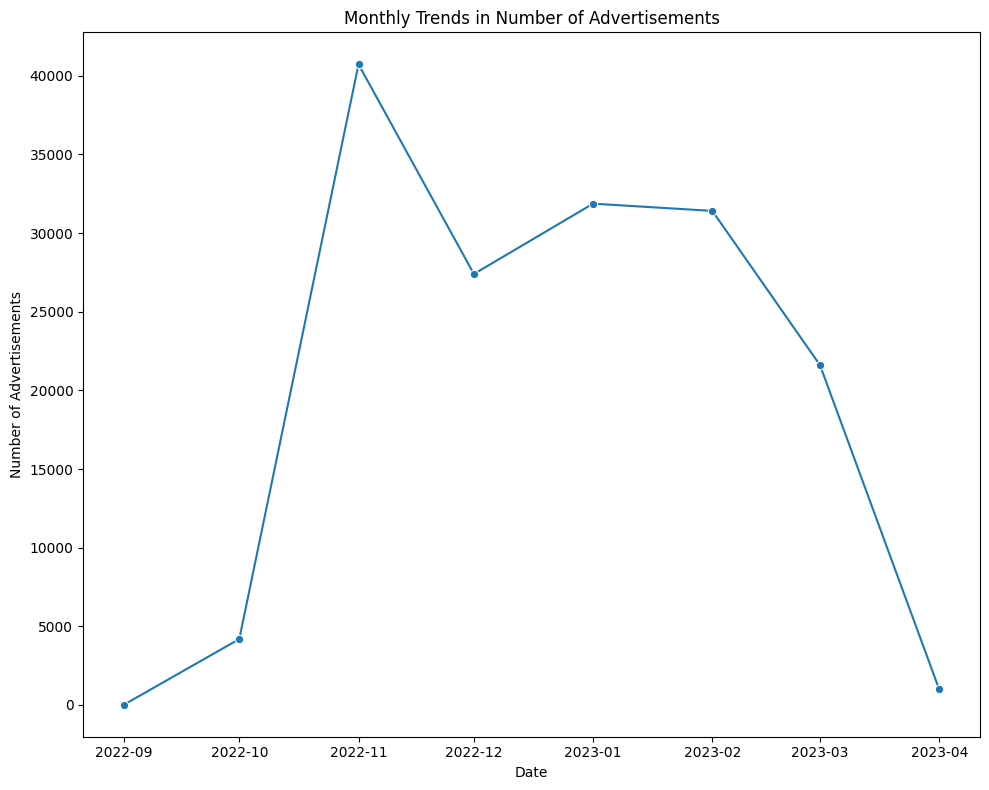

In [ ]:
df31['posted_date'] = pd.to_datetime(df31['posted_date'])
df31['deactivation_date'] = pd.to_datetime(df31['deactivation_date'])


# Extract temporal features
df31['year'] = df31['posted_date'].dt.year
df31['month'] = df31['posted_date'].dt.month
df31['quarter'] = df31['posted_date'].dt.quarter

# Clean and prepare data
df31['geo_region'] = df31['geo_region'].str.strip()

# Aggregate data by month and year to count the number of advertisements
monthly_ads = df31.groupby(['year', 'month']).size().reset_index(name='ad_count')

# Create a date column for easier plotting
monthly_ads['date'] = pd.to_datetime(monthly_ads[['year', 'month']].assign(day=1))

# Sort by date
monthly_ads = monthly_ads.sort_values('date')

# Set the plot size
plt.figure(figsize=(10, 8))

# Create a line plot for monthly trends
sns.lineplot(data=monthly_ads, x='date', y='ad_count', marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Advertisements')
plt.title('Monthly Trends in Number of Advertisements')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# Supply:

#     The supply of advertisements has been increasing from September 2022 to November 2022, indicating an increase in the availability of advertisements in the market.
#     The peak in November 2022 suggests that the supply of advertisements was at its highest during this period.
#     After November 2022, the supply of advertisements has been decreasing, indicating a reduction in the availability of advertisements in the market.

# Demand:

#     The decreasing trend in the number of advertisements from November 2022 to April 2023 suggests that the demand for advertisements may be decreasing.
#     The decrease in supply from November 2022 to April 2023 could be a response to the decreasing demand, as advertisers may be reducing their advertising budgets or shifting their focus to other marketing channels.
#     The fact that the supply of advertisements has not dropped to zero suggests that there is still some demand for advertisements, but it may be decreasing.

# Supply-Demand Balance:

#     From September 2022 to November 2022, the supply of advertisements was increasing, which may have led to a surplus of advertisements in the market. This could have put downward pressure on prices.
#     After November 2022, the supply of advertisements has been decreasing, which may have led to a better balance between supply and demand. However, the decreasing trend in supply suggests that the market may be shifting towards a state of undersupply, which could lead to upward pressure on prices.

# Overall, the graph suggests that the market for advertisements may be experiencing a shift from a state of surplus to a state of undersupply, which could have implications for prices and the overall advertising landscape.